In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-1/nifty_sensex_close_data/data/Sensex_2011_to_2023(separated).csv')

In [11]:
df = data[['Date','M&M.NS(close)']]

In [12]:
#parameters
n = 5
m = 50
t = 100

In [13]:
df.loc[:,'EMAa'] = df['M&M.NS(close)'].ewm(span=n, adjust=False).mean()

df.loc[:,'EMAb'] = df['M&M.NS(close)'].ewm(span=m, adjust=False).mean()

df.loc[:,'EMAc'] = df['M&M.NS(close)'].ewm(span=t, adjust=False).mean()

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_65027/3613663076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'EMAa'] = df['M&M.NS(close)'].ewm(span=n, adjust=False).mean()
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_65027/3613663076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'EMAb'] = df['M&M.NS(close)'].ewm(span=m, adjust=False).mean()
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_65027/3613663076.py:5: SettingWithCopyWarning: 
A val

In [22]:
for i in range(n):
    df.loc[i,'EMAa'] = None
for i in range(m):
    df.loc[i,'EMAb'] = None
for i in range(t):
    df.loc[i,'EMAc'] = None

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df)

            Date  M&M.NS(close)         EMAa         EMAb         EMAc
0     2011-01-03     354.620422          NaN          NaN          NaN
1     2011-01-04     351.783600          NaN          NaN          NaN
2     2011-01-05     347.190735          NaN          NaN          NaN
3     2011-01-06     347.280792          NaN          NaN          NaN
4     2011-01-07     333.344513          NaN          NaN          NaN
5     2011-01-10     328.053772   339.028957          NaN          NaN
6     2011-01-11     330.935547   336.331153          NaN          NaN
7     2011-01-12     338.275146   336.979151          NaN          NaN
8     2011-01-13     332.173859   335.377387          NaN          NaN
9     2011-01-14     333.006866   334.587213          NaN          NaN
10    2011-01-17     332.151337   333.775255          NaN          NaN
11    2011-01-18     336.091278   334.547262          NaN          NaN
12    2011-01-19     338.095032   335.729852          NaN          NaN
13    

In [16]:
trades = pd.DataFrame(columns=[['Date','Order Type','Price']])


In [17]:
for i in range(t+1,len(df.index)):
    if df.loc[i-1,'EMAa'] > df.loc[i-1,'EMAb'] and df.loc[i-1,'EMAa'] > df.loc[i-1,'EMAc']:
        trades.loc[len(trades.index)]  = [df.loc[i,'Date'],'Buy',df.loc[i,'M&M.NS(close)']]
    if df.loc[i-1,'EMAa'] < df.loc[i-1,'EMAb'] and df.loc[i-1,'EMAa'] < df.loc[i-1,'EMAc']:
        trades.loc[len(trades.index)]  = [df.loc[i,'Date'],'Sell',df.loc[i,'M&M.NS(close)']]

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(trades)

     index        Date Order Type        Price
0        1  2011-06-01       Sell   304.323761
1        2  2011-06-02       Sell   297.862244
2        3  2011-06-03       Sell   301.261871
3        4  2011-06-06       Sell   296.106171
4        5  2011-06-07       Sell   299.100494
5        6  2011-06-08       Sell   299.122986
6        7  2011-06-09       Sell   299.640869
7        8  2011-06-10       Sell   298.177429
8        9  2011-06-13       Sell   299.077942
9       10  2011-06-14       Sell   302.432648
10      11  2011-06-15       Sell   299.370636
11      12  2011-06-16       Sell   295.880951
12      13  2011-06-17       Sell   290.027344
13      14  2011-06-20       Sell   285.141724
14      15  2011-06-21       Sell   285.682068
15      16  2011-06-22       Sell   292.098663
16      17  2011-06-23       Sell   294.237488
17      18  2011-06-24       Sell   303.400696
18      19  2011-06-27       Sell   312.181244
19      20  2011-06-28       Sell   312.609009
20      21  2

In [20]:
trades['Order Type']=trades['Order Type'].astype('str')
if trades.loc[0]['Order Type']=='Sell':
    trades=trades[1:]
if trades.loc[len(trades.index)]['Order Type']=='Buy':
    trades=trades[:-1]

trades.reset_index(inplace=True)
trades

,index,Date,Order Type,Price
0,1,2011-06-01,Sell,304.323761
1,2,2011-06-02,Sell,297.862244
2,3,2011-06-03,Sell,301.261871
3,4,2011-06-06,Sell,296.106171
4,5,2011-06-07,Sell,299.100494
...,...,...,...,...
2749,2750,2023-12-21,Buy,1633.849976
2750,2751,2023-12-22,Buy,1634.250000
2751,2752,2023-12-26,Buy,1662.250000
2752,2753,2023-12-27,Buy,1687.949951


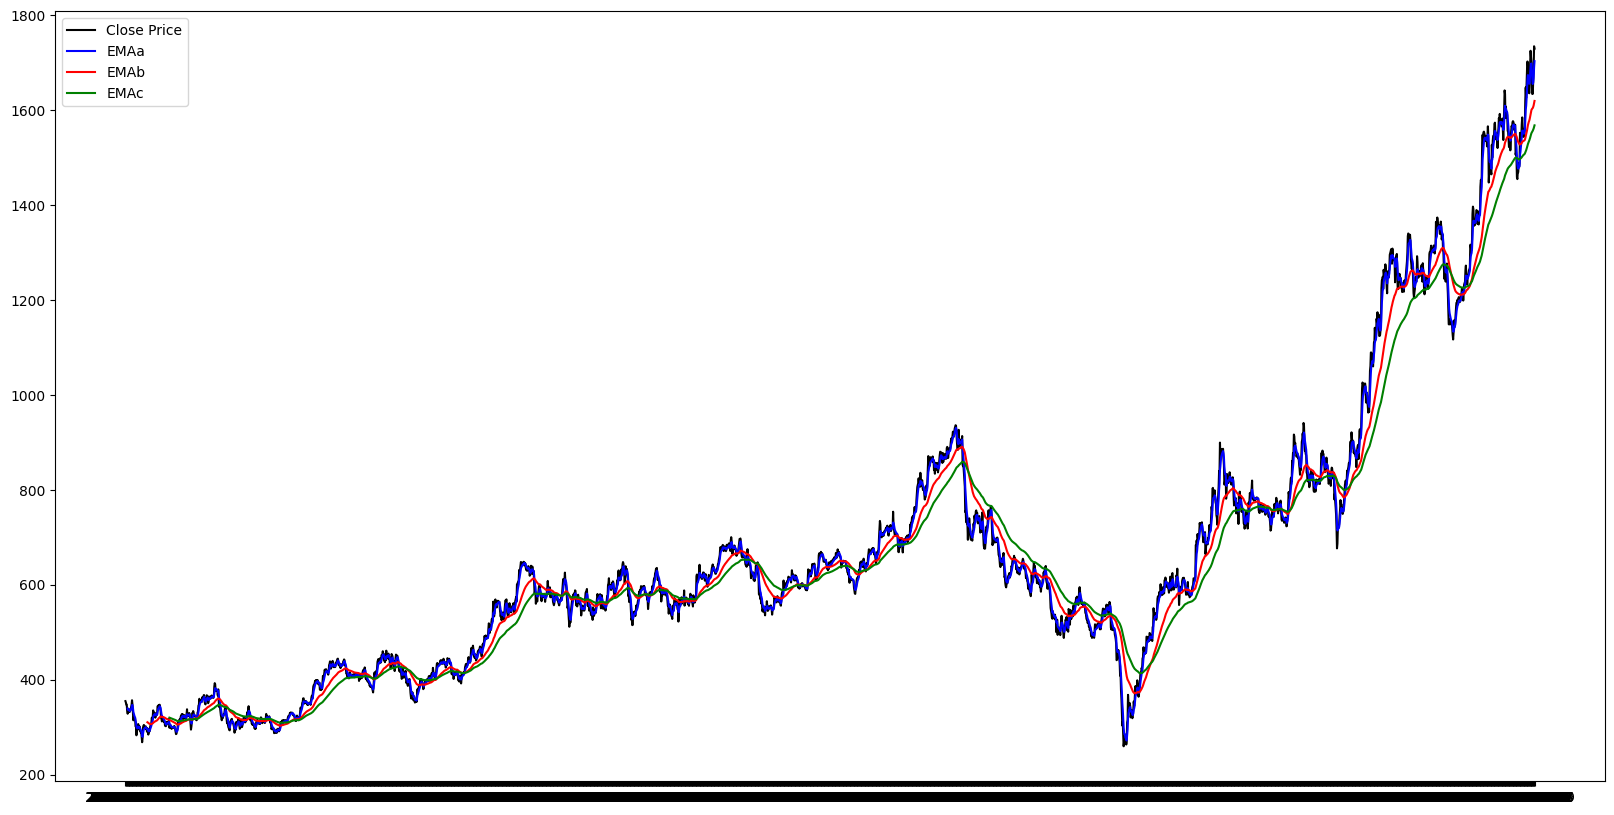

In [19]:
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['M&M.NS(close)'],label='Close Price',color='black')
plt.plot(df['Date'],df['EMAa'],label='EMAa',color='blue')
plt.plot(df['Date'],df['EMAb'],label='EMAb',color='red')
plt.plot(df['Date'],df['EMAc'],label='EMAc',color='green')
plt.legend()
plt.show()